## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#test ={"Drugs": ["Ramicane", "Naftol"],
        #"Tumor Volume": [mouse_results_df.iloc[:,6]]}
#test_df=pd.DataFrame(test, columns=["Drugs", "Tumor Volume"])

In [4]:
#Checking for duplicate time id's
mouse_results_df["Mouse ID"].value_counts()

g989    13
z581    10
m957    10
r604    10
l897    10
        ..
f932     1
o848     1
v199     1
n482     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Checking the number of mice.
mouse_results_df["Mouse ID"].count()

1893

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_results_df.drop_duplicates(subset=["Mouse ID" ,"Timepoint"], keep ="first")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

1888

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_data = clean_data[["Mouse ID", "Drug Regimen", "Sex", "Timepoint", "Tumor Volume (mm3)"]]
summary_data_df=summary_data.groupby("Drug Regimen")
summary_data_df.describe()

Timepoint                                                      \
                 count       mean        std  min   25%   50%    75%   max   
Drug Regimen                                                                 
Capomulin        230.0  21.565217  14.384994  0.0  10.0  20.0  35.00  45.0   
Ceftamin         178.0  19.747191  14.283969  0.0   5.0  20.0  30.00  45.0   
Infubinol        178.0  18.174157  13.473473  0.0   5.0  15.0  30.00  45.0   
Ketapril         188.0  19.707447  14.029935  0.0   5.0  20.0  30.00  45.0   
Naftisol         186.0  19.623656  14.184814  0.0   5.0  20.0  30.00  45.0   
Placebo          181.0  18.674033  13.890798  0.0   5.0  15.0  30.00  45.0   
Propriva         156.0  17.083333  13.571297  0.0   5.0  15.0  26.25  45.0   
Ramicane         228.0  21.425439  14.275720  0.0  10.0  20.0  35.00  45.0   
Stelasyn         181.0  19.226519  13.842710  0.0   5.0  20.0  30.00  45.0   
Zoniferol        182.0  19.368132  14.384679  0.0   5.0  15.0  30.00  45.0   

             Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  156.0  52.393463  6.568014  45.000000  47.046068   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_stat=summary_data_df["Tumor Volume (mm3)"].mean()
median_stat=summary_data_df["Tumor Volume (mm3)"].median()
std_dev_stat=summary_data_df["Tumor Volume (mm3)"].std()
variance_stat=summary_data_df["Tumor Volume (mm3)"].var()
sample_stat=summary_data_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
statistical_df=pd.DataFrame({"Mean": mean_stat,
                            "Median": median_stat,
                            "Std Dev": std_dev_stat,
                            "Variance": variance_stat,
                            "SEM": sample_stat})

statistical_df.head(10)


,Mean,Median,Std Dev,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
for label, row in statistical_df.iterrows():
    print(label)
    print(row)

Capomulin
Mean        40.675741
Median      41.557809
Std Dev      4.994774
Variance    24.947764
SEM          0.329346
Name: Capomulin, dtype: float64
Ceftamin
Mean        52.591172
Median      51.776157
Std Dev      6.268188
Variance    39.290177
SEM          0.469821
Name: Ceftamin, dtype: float64
Infubinol
Mean        52.884795
Median      51.820584
Std Dev      6.567243
Variance    43.128684
SEM          0.492236
Name: Infubinol, dtype: float64
Ketapril
Mean        55.235638
Median      53.698743
Std Dev      8.279709
Variance    68.553577
SEM          0.603860
Name: Ketapril, dtype: float64
Naftisol
Mean        54.331565
Median      52.509285
Std Dev      8.134708
Variance    66.173479
SEM          0.596466
Name: Naftisol, dtype: float64
Placebo
Mean        54.033581
Median      52.288934
Std Dev      7.821003
Variance    61.168083
SEM          0.581331
Name: Placebo, dtype: float64
Propriva
Mean        52.393463
Median      50.909965
Std Dev      6.568014
Variance    43.138803
S

In [11]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

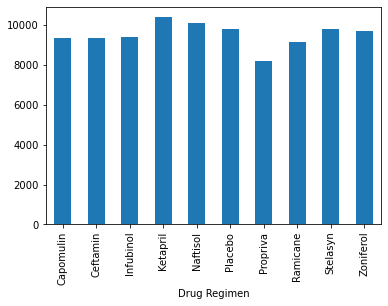

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar=summary_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sum().plot.bar(x="Tumor Volume (mm3)", rot=90)


In [12]:
# suggestion from Eric
summary_data.groupby("Drug Regimen").count()

,Mouse ID,Sex,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,230,230,230,230
Ceftamin,178,178,178,178
Infubinol,178,178,178,178
Ketapril,188,188,188,188
Naftisol,186,186,186,186
Placebo,181,181,181,181
Propriva,156,156,156,156
Ramicane,228,228,228,228
Stelasyn,181,181,181,181


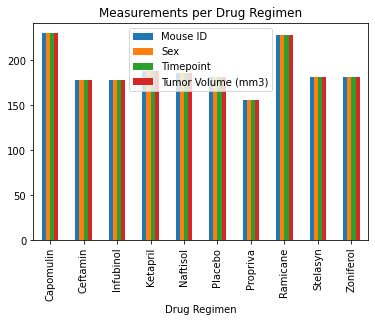

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements_df = summary_data.groupby("Drug Regimen").count()
measurements_df.plot(kind="bar")

plt.title("Measurements per Drug Regimen")
plt.show()
plt.tight_layout()

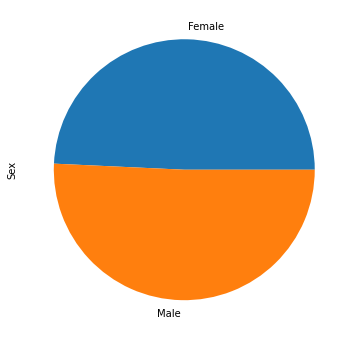

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = summary_data.groupby("Sex")["Sex"].count()
pie_df.plot.pie(y="Male", figsize=(10,6))

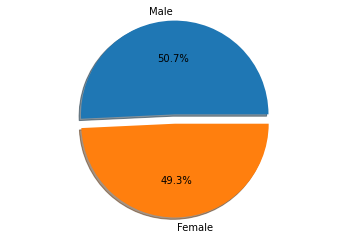

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels="Male", "Female"
sizes=[958, 930]
explode=(0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=360)
ax1.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_df=summary_data.set_index("Drug Regimen")
target_drugs_df=drugs_df.loc[["Capomulin", "Ramicane", "Infubinol","Ceftamin"], ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#target_drugs_df


# Start by getting the last (greatest) timepoint for each mouse

mice_df=target_drugs_df
target_mice_df=mice_df.groupby("Mouse ID").max()
#target_mice_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_data_df=pd.merge(target_drugs_df, target_mice_df, on="Mouse ID", how="left")

final_data_df


,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Timepoint_y,Tumor Volume (mm3)_y
0,s185,0,45.000000,45,45.000000
1,s185,5,43.878496,45,45.000000
2,s185,10,37.614948,45,45.000000
3,s185,15,38.177232,45,45.000000
4,s185,20,36.866876,45,45.000000
...,...,...,...,...,...
809,y865,25,57.173538,45,64.729837
810,y865,30,59.033275,45,64.729837
811,y865,35,61.153140,45,64.729837
812,y865,40,63.469549,45,64.729837


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Raamicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles=tumor_vol.quartile([0.25, 0.5, 0.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
irq=upperq-lowerq
lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)



    # Locate the rows which contain mice on each drug and get the tumor volumes
    #for tumor_vol in tumor_volume:
        
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")    

AttributeError: 'list' object has no attribute 'quartile'

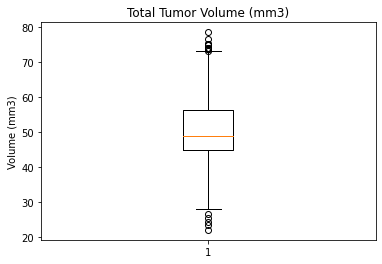

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1=plt.subplots()
ax1.set_title("Total Tumor Volume (mm3)")
ax1.set_ylabel("Volume (mm3)")
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

ValueError: x and y must have same first dimension, but have shapes (230,) and (814,)

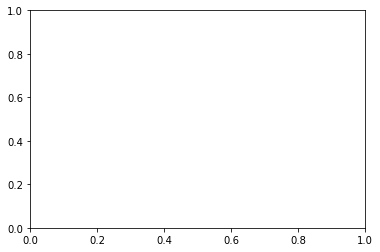

In [77]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
target_drugs_df.reset_index()
capomulin_results_df=target_drugs_df.loc["Capomulin", "Timepoint": "Tumor Volume (mm3)"]
#capomulin_results_df
x_axis=capomulin_results_df["Tumor Volume (mm3)"]
y_axis=target_drugs_df["Timepoint"]
plt.plot(x_axis, y_axis)


In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data_df=target_drugs_df[["Timepoint", "Tumor Volume (mm3)"]]
scatter_data_df=scatter_data_df.loc["Capomulin", "Tumor Volume (mm3)"].mean()
x_values=scatter_data_df["Tumor Volume (mm3)"]
y_values=scatter_data_df["Timepoint"]
plt.scatter(x_values, y_values)
plt.xlabel("Tumor Volume (mm3)")
plt.y_label("Timepoint")
plt.show()


TypeError: 'builtin_function_or_method' object is not subscriptable

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=scatter_data_df["Tumor Volume (mm3)"]
y_values=scatter_data_df["Timepoint"]
(slope, intertecept, rvalue, pvalue, stderr)=linergress(x_values, y_values)
regress_values=xvalues*slope+intercept
line_eq="y="+str(round(slope, 2))+"x +"+str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="green")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoints")
plt.show()

TypeError: 'float' object is not subscriptable